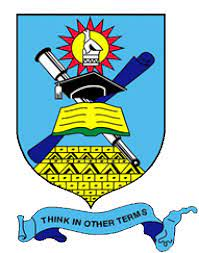

                                        FACULTY OF APPLIED SCIENCES

                                        DEPARTMENT OF COMPUTER SCIENCE

                                         (BSc Hons INFORMATICS)
Student Name:...................................................................................Solomon Myambo

Student Number:................................................................................ n0187918p

Supervisor: .......................................................................................MrJ Mutengeni

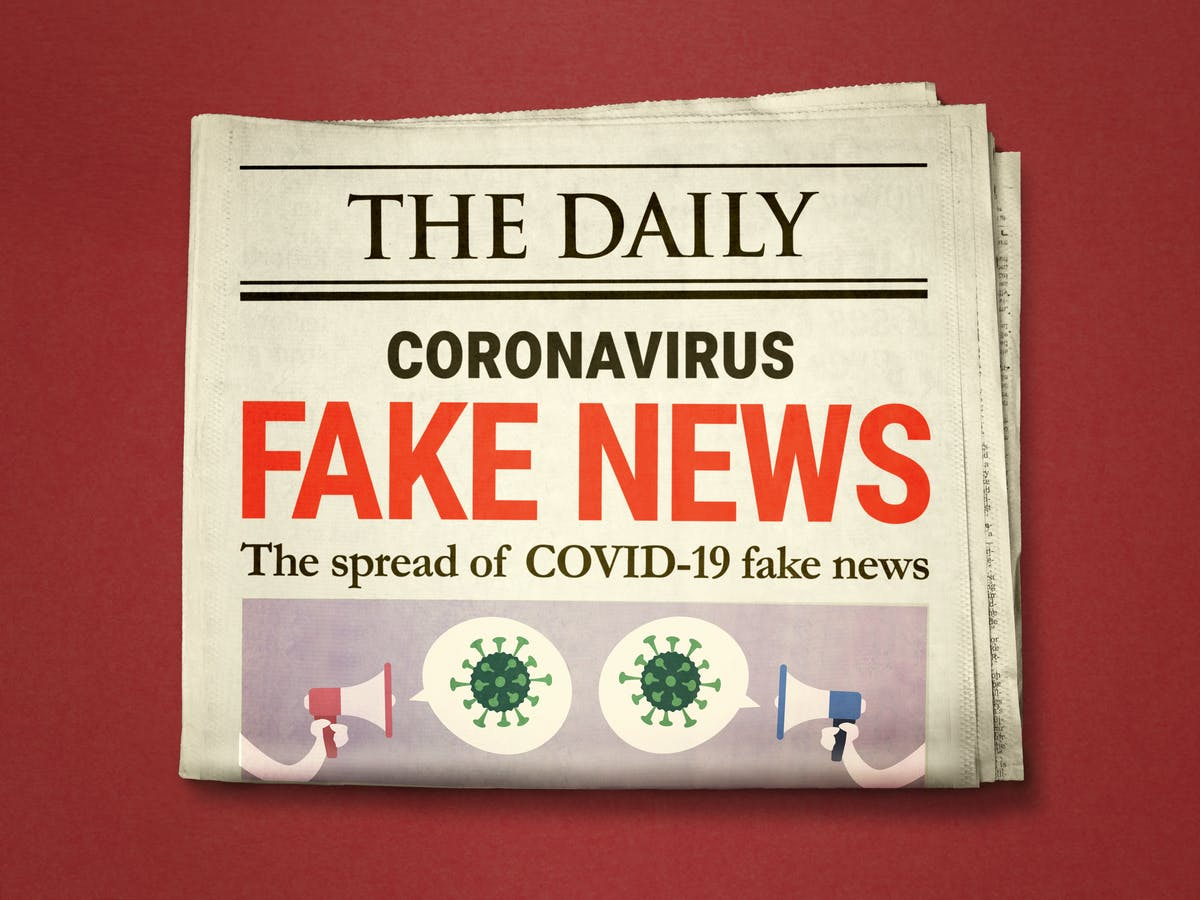

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Embedding,LSTM,Dense,Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot

Importing Dataset

In [2]:
df = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
df.head()


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
test.head()

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


<AxesSubplot:>

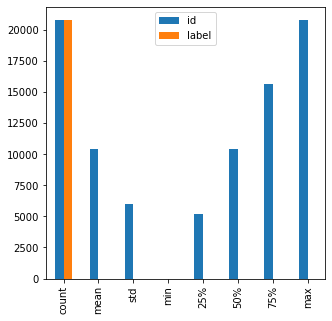

In [5]:
import pylab as plt
df.describe().plot.bar(figsize = (5,5))

<AxesSubplot:>

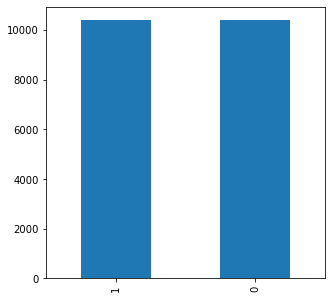

In [6]:
df['label'].value_counts().plot.bar(figsize =(5,5))

# Data preprocessing and cleaning¶


In [5]:
#filling NULL values with empty string
df=df.fillna('')
test=test.fillna('')

In [6]:
#We will be only using title and author name for prediction
# Creating new column total concatenating title and author
df['total'] = df['title']+' '+df['author']
test['total']=test['title']+' '+test['author']

In [7]:
X = df.drop('label',axis=1)
y=df['label']
print(X.shape)
print(y.shape)

(20800, 5)
(20800,)


In [8]:
#Choosing vocabulary size to be 5000 and copying data to msg for further cleaning
voc_size = 5000
msg = X.copy()
msg_test = test.copy()

In [11]:
#Downloading stopwords 
#Stopwords are the words in any language which does not add much meaning to a sentence.
#They can safely be ignored without sacrificing the meaning of the sentence.
import nltk
import re
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to C:\Users\HOMBS THE
[nltk_data]     GREAT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
#We will be using Stemming here
#Stemming map words to their root forms
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []

In [13]:
#Applying stemming and some preprocessing
for i in range(len(msg)):
  review = re.sub('[^a-zA-Z]',' ',msg['total'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus.append(review)

In [14]:
#Applying stemming and some preprocessing for test data
corpus_test = []
for i in range(len(msg_test)):
  review = re.sub('[^a-zA-Z]',' ',msg_test['total'][i])
  review = review.lower()
  review = review.split()
  review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
  review = ' '.join(review)
  corpus_test.append(review)

In [15]:
# Converting to one hot representation
onehot_rep = [one_hot(words,voc_size)for words in corpus]
onehot_rep_test = [one_hot(words,voc_size)for words in corpus_test]

In [16]:
#Padding Sentences to make them of same size
embedded_docs = pad_sequences(onehot_rep,padding='pre',maxlen=25)
embedded_docs_test = pad_sequences(onehot_rep_test,padding='pre',maxlen=25)

# Creating and training model¶


In [24]:
#We have used embedding layers with LSTM
model = Sequential()
model.add(Embedding(voc_size,40,input_length=25))
model.add(Dropout(0.3))
model.add(LSTM(100))
model.add(Dropout(0.3))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 25, 40)            200000    
                                                                 
 dropout_3 (Dropout)         (None, 25, 40)            0         
                                                                 
 lstm_1 (LSTM)               (None, 100)               56400     
                                                                 
 dropout_4 (Dropout)         (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                6464      
                                                                 
 dropout_5 (Dropout)         (None, 64)                0         
                                                                 
 dense_3 (Dense)             (None, 1)                

In [18]:
#Converting into numpy array
X_final = np.array(embedded_docs)
y_final = np.array(y)
test_final = np.array(embedded_docs_test)
X_final.shape,y_final.shape,test_final.shape

((20800, 25), (20800,), (5200, 25))

#training model

In [19]:

model.fit(X_final,y_final,epochs=20,batch_size=64)

Epoch 1/20
325/325 [==============================] - 21s 47ms/step - loss: 0.1483 - accuracy: 0.9330
Epoch 2/20
325/325 [==============================] - 15s 46ms/step - loss: 0.0195 - accuracy: 0.9945
Epoch 3/20
325/325 [==============================] - 15s 46ms/step - loss: 0.0096 - accuracy: 0.9976
Epoch 4/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0058 - accuracy: 0.9984
Epoch 5/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0034 - accuracy: 0.9990
Epoch 6/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0025 - accuracy: 0.9991
Epoch 7/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0019 - accuracy: 0.9993
Epoch 8/20
325/325 [==============================] - 15s 46ms/step - loss: 0.0017 - accuracy: 0.9994
Epoch 9/20
325/325 [==============================] - 15s 47ms/step - loss: 0.0013 - accuracy: 0.9997
Epoch 10/20
325/325 [==============================] - 15s 47ms/step - loss: 0.002

# Creating Submission file¶


Since this is a binary problem (fake=1 or real=0), the output class is determined by whether the probability is bigger than 0.5. Hence the code below

In [20]:
pred_results = (model.predict(test_final) > 0.5)*1


163/163 [==============================] - 4s 15ms/step


In [22]:
final_sub = pd.DataFrame()
final_sub['id']=test['id']
final_sub['title']=test['title']
final_sub['label'] = pred_results
final_sub.to_csv('final_sub.csv',index=False)

In [23]:
final_sub.head()


,id,title,label
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",0
1,20801,Russian warships ready to strike terrorists ne...,1
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,1
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",0
4,20804,Keiser Report: Meme Wars (E995),1
